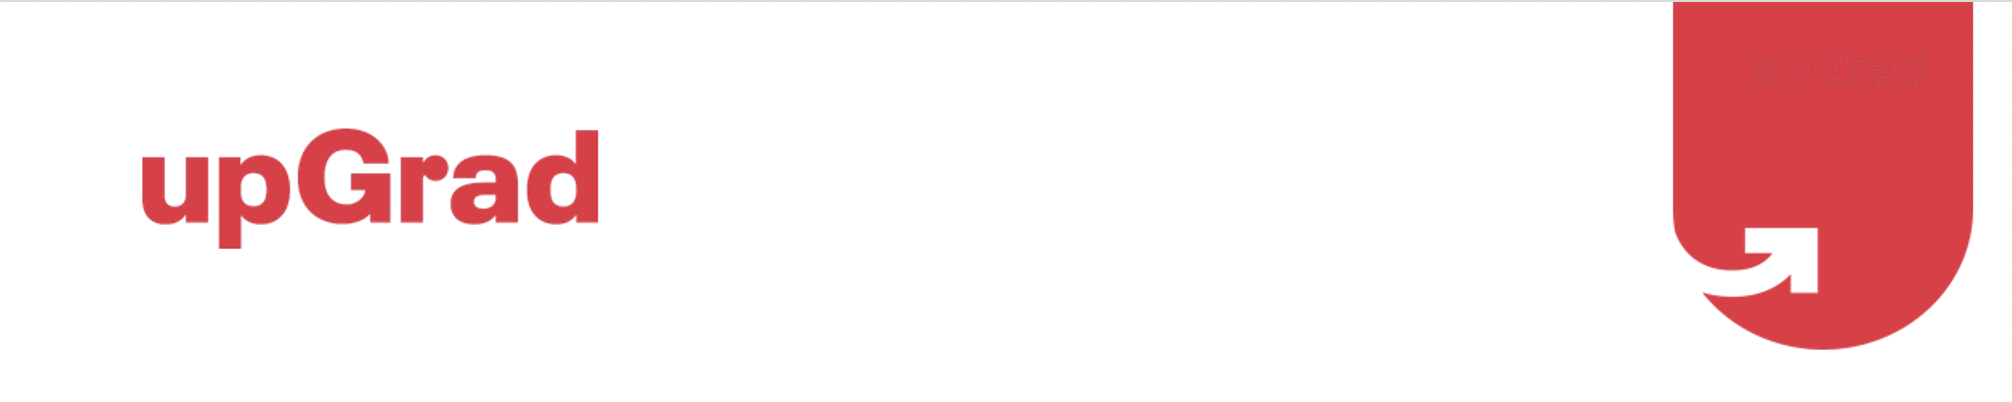

# Churn case.

In [1]:
import pandas as pd
import sqlite3
import warnings
warnings.filterwarnings("ignore")

## Reading all CSV files with Pandas

In [3]:
customer = pd.read_csv("customer.csv")
customer.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents
0,3668-QPYBK,Male,No,No,No
1,9237-HQITU,Female,No,No,Yes
2,9305-CDSKC,Female,No,No,Yes
3,7892-POOKP,Female,No,Yes,Yes
4,0280-XJGEX,Male,No,No,Yes


In [4]:
cust_loc = pd.read_csv("cust_loc.csv")
cust_loc.head()

,Cust_ID,State,Latitude,Longitude,ZipCode
0,3668-QPYBK,California,33.964131,-118.272783,90003
1,9237-HQITU,California,34.059281,-118.307420,90005
2,9305-CDSKC,California,34.048013,-118.293953,90006
3,7892-POOKP,California,34.062125,-118.315709,90010
4,0280-XJGEX,California,34.039224,-118.266293,90015


In [5]:
cust_services = pd.read_csv("cust_services.csv")
cust_services.head()

,Cust_ID,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,3668-QPYBK,Yes,No,DSL,Yes,Yes,No,No,No,No
1,9237-HQITU,Yes,No,Fiber optic,No,No,No,No,No,No
2,9305-CDSKC,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
3,7892-POOKP,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
4,0280-XJGEX,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes


In [6]:
cust_account = pd.read_csv("cust_account.csv")
cust_account.head()

,Account_id,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges
0,3668-QPYBK,2,Month-to-month,Mailed check,Yes,53.85,108.15
1,9237-HQITU,2,Month-to-month,Electronic check,Yes,70.70,151.65
2,9305-CDSKC,8,Month-to-month,Electronic check,Yes,99.65,820.5
3,7892-POOKP,28,Month-to-month,Electronic check,Yes,104.80,3046.05
4,0280-XJGEX,49,Month-to-month,Bank transfer (automatic),Yes,103.70,5036.3


In [7]:
cust_account.dtypes

Account_id           object
Tenure                int64
Contract             object
PaymentMethod        object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [8]:
cust_churn = pd.read_csv("cust_churn.csv")
cust_churn.head()

,Id,Churn
0,3668-QPYBK,Yes
1,9237-HQITU,Yes
2,9305-CDSKC,Yes
3,7892-POOKP,Yes
4,0280-XJGEX,Yes


## Create database and tables

In [9]:
conn = sqlite3.connect("churn.db")
cur = conn.cursor()

In [10]:
# Create customer table
customer.to_sql("customer", conn, if_exists="replace", index=False)

In [11]:
# Create customer location table
cust_loc.to_sql("cust_loc", conn, if_exists="replace", index=False)

In [12]:
# Create customer services table
cust_services.to_sql("cust_services", conn, if_exists="replace", index=False)

In [13]:
# Create customer accountcust_account table
cust_account.to_sql("cust_account", conn, if_exists="replace", index=False)

In [14]:
# Create customer churn table
cust_churn.to_sql("cust_churn", conn, if_exists="replace", index=False)

## Information about our tables

In [15]:
def table_info(conn,cursor):
    """
    prints out all of the columns of every table in the DB
    
    conn: database connection object
    cursor: cursor object
    """
    
    tables = cur.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
    for table_name in tables:
        table_name = table_name[0]
        table = pd.read_sql_query("SELECT * from {} LIMIT 0".format(table_name), conn)
        print(table_name)
        for col in table.columns:
            print("\t "+ col)
            print()

In [16]:
table_info(conn,cur)

customer
	 CustomerID

	 Gender

	 SeniorCitizen

	 Partner

	 Dependents

cust_loc
	 Cust_ID

	 State

	 Latitude

	 Longitude

	 ZipCode

cust_services
	 Cust_ID

	 PhoneService

	 MultipleLines

	 InternetService

	 OnlineSecurity

	 OnlineBackup

	 DeviceProtection

	 TechSupport

	 StreamingTV

	 StreamingMovies

cust_account
	 Account_id

	 Tenure

	 Contract

	 PaymentMethod

	 PaperlessBilling

	 MonthlyCharges

	 TotalCharges

cust_churn
	 Id

	 Churn



## Join all tables

In [17]:
## Rename Cust_ID to CustomerID

cur.execute(
"""
ALTER TABLE cust_loc
RENAME COLUMN Cust_ID TO CustomerID;
""")

In [18]:
table_info(conn,cur)

customer
	 CustomerID

	 Gender

	 SeniorCitizen

	 Partner

	 Dependents

cust_loc
	 CustomerID

	 State

	 Latitude

	 Longitude

	 ZipCode

cust_services
	 Cust_ID

	 PhoneService

	 MultipleLines

	 InternetService

	 OnlineSecurity

	 OnlineBackup

	 DeviceProtection

	 TechSupport

	 StreamingTV

	 StreamingMovies

cust_account
	 Account_id

	 Tenure

	 Contract

	 PaymentMethod

	 PaperlessBilling

	 MonthlyCharges

	 TotalCharges

cust_churn
	 Id

	 Churn



In [19]:
cur.execute(
"""
SELECT 
*
FROM customer
INNER JOIN cust_loc
USING (CustomerID)
""")
cur.fetchone()

('3668-QPYBK',
 'Male',
 'No',
 'No',
 'No',
 'California',
 33.964131,
 -118.272783,
 90003)

In [20]:
cust_loc = cust_loc.rename(columns={"Cust_ID": "CustomerID"})

In [21]:
cust_loc.head()

,CustomerID,State,Latitude,Longitude,ZipCode
0,3668-QPYBK,California,33.964131,-118.272783,90003
1,9237-HQITU,California,34.059281,-118.307420,90005
2,9305-CDSKC,California,34.048013,-118.293953,90006
3,7892-POOKP,California,34.062125,-118.315709,90010
4,0280-XJGEX,California,34.039224,-118.266293,90015


In [22]:
pd.concat([customer,cust_loc], join="inner", axis=1)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,CustomerID,State,Latitude,Longitude,ZipCode
0,3668-QPYBK,Male,No,No,No,3668-QPYBK,California,33.964131,-118.272783,90003
1,9237-HQITU,Female,No,No,Yes,9237-HQITU,California,34.059281,-118.307420,90005
2,9305-CDSKC,Female,No,No,Yes,9305-CDSKC,California,34.048013,-118.293953,90006
3,7892-POOKP,Female,No,Yes,Yes,7892-POOKP,California,34.062125,-118.315709,90010
4,0280-XJGEX,Male,No,No,Yes,0280-XJGEX,California,34.039224,-118.266293,90015
...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,No,No,No,2569-WGERO,California,34.341737,-116.539416,92285
7039,6840-RESVB,Male,No,Yes,Yes,6840-RESVB,California,34.667815,-117.536183,92301
7040,2234-XADUH,Female,No,Yes,Yes,2234-XADUH,California,34.559882,-115.637164,92304
7041,4801-JZAZL,Female,No,Yes,Yes,4801-JZAZL,California,34.167800,-116.864330,92305


In [23]:
# Rename remaining columns from tables
cust_services = cust_services.rename(columns={"Cust_ID": "CustomerID"})
cust_account = cust_account.rename(columns={"Account_id": "CustomerID"})
cust_churn = cust_churn.rename(columns={"Id": "CustomerID"})

In [24]:
dfs_to_join = [customer, cust_loc, cust_services, cust_account, cust_churn]

In [29]:
#filtering data with Loc
customer.loc[customer["Gender"] == "Male",]

,CustomerID,Gender,SeniorCitizen,Partner,Dependents
0,3668-QPYBK,Male,No,No,No
4,0280-XJGEX,Male,No,No,Yes
6,8779-QRDMV,Male,Yes,No,No
7,1066-JKSGK,Male,No,No,No
8,6467-CHFZW,Male,No,Yes,Yes
...,...,...,...,...,...
7034,3605-JISKB,Male,Yes,Yes,No
7035,9767-FFLEM,Male,No,No,No
7036,8456-QDAVC,Male,No,No,No
7039,6840-RESVB,Male,No,Yes,Yes


In [33]:
churn_all = pd.concat(dfs_to_join, join="inner", axis=1)

In [34]:
#check for duplicates
churn_all.columns.duplicated()

array([False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False])

In [35]:
churn_all = churn_all.loc[:, ~churn_all.columns.duplicated()]

In [36]:
churn_all.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,State,Latitude,Longitude,ZipCode,PhoneService,...,TechSupport,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,3668-QPYBK,Male,No,No,No,California,33.964131,-118.272783,90003,Yes,...,No,No,No,2,Month-to-month,Mailed check,Yes,53.85,108.15,Yes
1,9237-HQITU,Female,No,No,Yes,California,34.059281,-118.307420,90005,Yes,...,No,No,No,2,Month-to-month,Electronic check,Yes,70.70,151.65,Yes
2,9305-CDSKC,Female,No,No,Yes,California,34.048013,-118.293953,90006,Yes,...,No,Yes,Yes,8,Month-to-month,Electronic check,Yes,99.65,820.5,Yes
3,7892-POOKP,Female,No,Yes,Yes,California,34.062125,-118.315709,90010,Yes,...,Yes,Yes,Yes,28,Month-to-month,Electronic check,Yes,104.80,3046.05,Yes
4,0280-XJGEX,Male,No,No,Yes,California,34.039224,-118.266293,90015,Yes,...,No,Yes,Yes,49,Month-to-month,Bank transfer (automatic),Yes,103.70,5036.3,Yes


In [37]:
churn_all.dtypes

CustomerID           object
Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
State                object
Latitude            float64
Longitude           float64
ZipCode               int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Tenure                int64
Contract             object
PaymentMethod        object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [38]:
churn_all["TotalCharges"] = pd.to_numeric(churn_all["TotalCharges"], errors="coerce")

In [39]:
churn_all.dtypes

CustomerID           object
Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
State                object
Latitude            float64
Longitude           float64
ZipCode               int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Tenure                int64
Contract             object
PaymentMethod        object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [40]:
# Missing values
churn_all.isnull().sum(axis=0)

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
State                0
Latitude             0
Longitude            0
ZipCode              0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Tenure               0
Contract             0
PaymentMethod        0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [41]:
# Drop the missing values
churn_all = churn_all.dropna()

In [42]:
churn_all.isnull().sum(axis=0)

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
State               0
Latitude            0
Longitude           0
ZipCode             0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Tenure              0
Contract            0
PaymentMethod       0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [43]:
churn_all.dtypes

CustomerID           object
Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
State                object
Latitude            float64
Longitude           float64
ZipCode               int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Tenure                int64
Contract             object
PaymentMethod        object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [45]:
churn_all.to_sql("churn_all", conn, if_exists="replace", index=False)

DatabaseError: Execution failed on sql 'DROP TABLE "churn_all"': database table is locked

In [46]:
cur.execute("PRAGMA table_info('churn_all')").fetchall()

[(0, 'CustomerID', 'TEXT', 0, None, 0),
 (1, 'Gender', 'TEXT', 0, None, 0),
 (2, 'SeniorCitizen', 'TEXT', 0, None, 0),
 (3, 'Partner', 'TEXT', 0, None, 0),
 (4, 'Dependents', 'TEXT', 0, None, 0),
 (5, 'State', 'TEXT', 0, None, 0),
 (6, 'Latitude', 'REAL', 0, None, 0),
 (7, 'Longitude', 'REAL', 0, None, 0),
 (8, 'ZipCode', 'INTEGER', 0, None, 0),
 (9, 'PhoneService', 'TEXT', 0, None, 0),
 (10, 'MultipleLines', 'TEXT', 0, None, 0),
 (11, 'InternetService', 'TEXT', 0, None, 0),
 (12, 'OnlineSecurity', 'TEXT', 0, None, 0),
 (13, 'OnlineBackup', 'TEXT', 0, None, 0),
 (14, 'DeviceProtection', 'TEXT', 0, None, 0),
 (15, 'TechSupport', 'TEXT', 0, None, 0),
 (16, 'StreamingTV', 'TEXT', 0, None, 0),
 (17, 'StreamingMovies', 'TEXT', 0, None, 0),
 (18, 'Tenure', 'INTEGER', 0, None, 0),
 (19, 'Contract', 'TEXT', 0, None, 0),
 (20, 'PaymentMethod', 'TEXT', 0, None, 0),
 (21, 'PaperlessBilling', 'TEXT', 0, None, 0),
 (22, 'MonthlyCharges', 'REAL', 0, None, 0),
 (23, 'TotalCharges', 'REAL', 0, None, 0

In [47]:
pd.read_sql("select * from churn_all", conn)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,State,Latitude,Longitude,ZipCode,PhoneService,...,TechSupport,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,3668-QPYBK,Male,No,No,No,California,33.964131,-118.272783,90003,Yes,...,No,No,No,2,Month-to-month,Mailed check,Yes,53.85,108.15,Yes
1,9237-HQITU,Female,No,No,Yes,California,34.059281,-118.307420,90005,Yes,...,No,No,No,2,Month-to-month,Electronic check,Yes,70.70,151.65,Yes
2,9305-CDSKC,Female,No,No,Yes,California,34.048013,-118.293953,90006,Yes,...,No,Yes,Yes,8,Month-to-month,Electronic check,Yes,99.65,820.50,Yes
3,7892-POOKP,Female,No,Yes,Yes,California,34.062125,-118.315709,90010,Yes,...,Yes,Yes,Yes,28,Month-to-month,Electronic check,Yes,104.80,3046.05,Yes
4,0280-XJGEX,Male,No,No,Yes,California,34.039224,-118.266293,90015,Yes,...,No,Yes,Yes,49,Month-to-month,Bank transfer (automatic),Yes,103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,2569-WGERO,Female,No,No,No,California,34.341737,-116.539416,92285,Yes,...,No internet service,No internet service,No internet service,72,Two year,Bank transfer (automatic),Yes,21.15,1419.40,No
7028,6840-RESVB,Male,No,Yes,Yes,California,34.667815,-117.536183,92301,Yes,...,Yes,Yes,Yes,24,One year,Mailed check,Yes,84.80,1990.50,No
7029,2234-XADUH,Female,No,Yes,Yes,California,34.559882,-115.637164,92304,Yes,...,No,Yes,Yes,72,One year,Credit card (automatic),Yes,103.20,7362.90,No
7030,4801-JZAZL,Female,No,Yes,Yes,California,34.167800,-116.864330,92305,No,...,No,No,No,11,Month-to-month,Electronic check,Yes,29.60,346.45,No


## See all tables

In [48]:
cur.execute("select name from sqlite_master where type='table'")
cur.fetchall()

[('customer',),
 ('cust_loc',),
 ('cust_services',),
 ('cust_account',),
 ('cust_churn',),
 ('churn_all',)]

In [49]:
#Lets save the churn_all table to .csv

churn_all.to_csv('churn_all.csv')

# Analysis of LTV

Lifetime value (LTV) is the total worth to a business of a customer over the while period of their relationship. It's an important metric as it costs less to keep existings customers than to acquire new ones, so the idea of increasing the value of your existig customers is a great way to drive growth. 

In [50]:
df = pd.read_sql("select * from churn_all", conn)

In [51]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,State,Latitude,Longitude,ZipCode,PhoneService,...,TechSupport,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,3668-QPYBK,Male,No,No,No,California,33.964131,-118.272783,90003,Yes,...,No,No,No,2,Month-to-month,Mailed check,Yes,53.85,108.15,Yes
1,9237-HQITU,Female,No,No,Yes,California,34.059281,-118.307420,90005,Yes,...,No,No,No,2,Month-to-month,Electronic check,Yes,70.70,151.65,Yes
2,9305-CDSKC,Female,No,No,Yes,California,34.048013,-118.293953,90006,Yes,...,No,Yes,Yes,8,Month-to-month,Electronic check,Yes,99.65,820.50,Yes
3,7892-POOKP,Female,No,Yes,Yes,California,34.062125,-118.315709,90010,Yes,...,Yes,Yes,Yes,28,Month-to-month,Electronic check,Yes,104.80,3046.05,Yes
4,0280-XJGEX,Male,No,No,Yes,California,34.039224,-118.266293,90015,Yes,...,No,Yes,Yes,49,Month-to-month,Bank transfer (automatic),Yes,103.70,5036.30,Yes


## For those customers who unsubscribed the service, what was their average LTV? and how long did they usually stay in the service?

In [52]:
## Extract those who unsubscribed the serviced (Churn = Yes)

churn_df = pd.read_sql("select * from churn_all where Churn = 'Yes'", conn)

In [53]:
# Examine the distribution of TotalCharges
churn_df["TotalCharges"].describe()

count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: TotalCharges, dtype: float64

We can see that around 20% of the TotalCharges are very high, so let's divide the data to see each distribution.

In [64]:
# Find the 80th percentile of the data in TotalCharges
churn_df.TotalCharges.quantile(0.8)

2840.4100000000003

In [55]:
pd.read_sql("select * from churn_all where TotalCharges <= 2840.41", conn)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,State,Latitude,Longitude,ZipCode,PhoneService,...,TechSupport,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,3668-QPYBK,Male,No,No,No,California,33.964131,-118.272783,90003,Yes,...,No,No,No,2,Month-to-month,Mailed check,Yes,53.85,108.15,Yes
1,9237-HQITU,Female,No,No,Yes,California,34.059281,-118.307420,90005,Yes,...,No,No,No,2,Month-to-month,Electronic check,Yes,70.70,151.65,Yes
2,9305-CDSKC,Female,No,No,Yes,California,34.048013,-118.293953,90006,Yes,...,No,Yes,Yes,8,Month-to-month,Electronic check,Yes,99.65,820.50,Yes
3,4190-MFLUW,Female,No,Yes,No,California,34.066367,-118.309868,90020,Yes,...,Yes,No,No,10,Month-to-month,Credit card (automatic),No,55.20,528.35,Yes
4,8779-QRDMV,Male,Yes,No,No,California,34.023810,-118.156582,90022,No,...,No,No,Yes,1,Month-to-month,Electronic check,Yes,39.65,39.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4734,8456-QDAVC,Male,No,No,No,California,32.852947,-114.850784,92283,Yes,...,No,Yes,No,19,Month-to-month,Bank transfer (automatic),Yes,78.70,1495.10,No
4735,7750-EYXWZ,Female,No,No,No,California,34.159534,-116.425984,92284,No,...,Yes,Yes,Yes,12,One year,Electronic check,No,60.65,743.30,No
4736,2569-WGERO,Female,No,No,No,California,34.341737,-116.539416,92285,Yes,...,No internet service,No internet service,No internet service,72,Two year,Bank transfer (automatic),Yes,21.15,1419.40,No
4737,6840-RESVB,Male,No,Yes,Yes,California,34.667815,-117.536183,92301,Yes,...,Yes,Yes,Yes,24,One year,Mailed check,Yes,84.80,1990.50,No


In [56]:
churn_df.query("TotalCharges <= 2840.41")

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,State,Latitude,Longitude,ZipCode,PhoneService,...,TechSupport,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,3668-QPYBK,Male,No,No,No,California,33.964131,-118.272783,90003,Yes,...,No,No,No,2,Month-to-month,Mailed check,Yes,53.85,108.15,Yes
1,9237-HQITU,Female,No,No,Yes,California,34.059281,-118.307420,90005,Yes,...,No,No,No,2,Month-to-month,Electronic check,Yes,70.70,151.65,Yes
2,9305-CDSKC,Female,No,No,Yes,California,34.048013,-118.293953,90006,Yes,...,No,Yes,Yes,8,Month-to-month,Electronic check,Yes,99.65,820.50,Yes
5,4190-MFLUW,Female,No,Yes,No,California,34.066367,-118.309868,90020,Yes,...,Yes,No,No,10,Month-to-month,Credit card (automatic),No,55.20,528.35,Yes
6,8779-QRDMV,Male,Yes,No,No,California,34.023810,-118.156582,90022,No,...,No,No,Yes,1,Month-to-month,Electronic check,Yes,39.65,39.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,1122-JWTJW,Male,No,Yes,Yes,California,32.698964,-115.886656,92259,Yes,...,No,No,No,1,Month-to-month,Mailed check,Yes,70.65,70.65,Yes
1864,1699-HPSBG,Male,No,No,No,California,33.745746,-116.514215,92264,Yes,...,Yes,Yes,No,12,One year,Electronic check,Yes,59.80,727.80,Yes
1865,8775-CEBBJ,Female,No,No,No,California,32.790282,-115.689559,92273,Yes,...,No,No,No,9,Month-to-month,Bank transfer (automatic),Yes,44.20,403.35,Yes
1866,6894-LFHLY,Male,Yes,No,No,California,34.264124,-114.717964,92280,Yes,...,No,No,No,1,Month-to-month,Electronic check,Yes,75.75,75.75,Yes


In [57]:
# Divide the data by the 80th percentile of the data from the TotalCharges variable
total_charges_under80 = churn_df.query("TotalCharges <= 2840.41")
total_charges_above80 = churn_df.query("TotalCharges > 2840.41")

In [58]:
# Show the distribution of people under the 80th percentile
total_charges_under80.TotalCharges.describe()

count    1495.000000
mean      711.265819
std       766.848197
min        18.850000
25%        85.025000
50%       371.650000
75%      1128.225000
max      2839.650000
Name: TotalCharges, dtype: float64

In [59]:
# Show the distribution of people above the 80th percentile
total_charges_above80.TotalCharges.describe()

count     374.000000
mean     4811.723262
std      1436.724288
min      2841.550000
25%      3522.462500
50%      4571.100000
75%      5891.212500
max      8684.800000
Name: TotalCharges, dtype: float64

In [61]:
# Show the distribution of the tenure of people under the 80th percentile
total_charges_under80.Tenure.describe()

count    1495.000000
mean        9.935117
std        10.742349
min         1.000000
25%         1.000000
50%         6.000000
75%        15.000000
max        61.000000
Name: Tenure, dtype: float64

In [62]:
# Show the distribution of the tenure of people above the 80th percentile
total_charges_above80.Tenure.describe()

count    374.000000
mean      50.133690
std       12.334841
min       27.000000
25%       40.000000
50%       49.500000
75%       60.000000
max       72.000000
Name: Tenure, dtype: float64

The average LTV of the 80% of those who unsubscribed is \\$ 711, and their tenure is near 10 months. On the hand, the average LTV of the 20 % of those who unsubscribed is $ 4811, and their tenure is near 50 months.  

In [65]:
4811/711

6.766526019690577